<a href="https://www.kaggle.com/code/iqmansingh/crab-age-voting-regression-synthetic-data?scriptVersionId=133090847" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
print("Setup Complete")

/kaggle/input/synthetic-crab-age-dataset/syn_crab_data.csv
/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv
Setup Complete


In [3]:
crab_train = pd.read_csv('../input/playground-series-s3e16/train.csv')
crab_test = pd.read_csv('../input/playground-series-s3e16/test.csv')
syn_train = pd.read_csv('../input/synthetic-crab-age-dataset/syn_crab_data.csv')

In [4]:
print(crab_train.info(),crab_test.info(),syn_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49368 non-null  int64  
 1   Sex             49368 non-null  object 
 

In [5]:
crab_train = crab_train.append(syn_train)

/tmp/ipykernel_32/1083263082.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crab_train = crab_train.append(syn_train)


In [6]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124051 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124051 non-null  int64  
 1   Sex             124051 non-null  object 
 2   Length          124051 non-null  float64
 3   Diameter        124051 non-null  float64
 4   Height          124051 non-null  float64
 5   Weight          124051 non-null  float64
 6   Shucked Weight  124051 non-null  float64
 7   Viscera Weight  124051 non-null  float64
 8   Shell Weight    124051 non-null  float64
 9   Age             124051 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 10.4+ MB


In [7]:
# train_dup = crab_train[crab_train.duplicated()]
# train_dup.shape

In [8]:
crab_train['Sex'].unique()

array(['I', 'M', 'F', '1'], dtype=object)

In [9]:
crab_train['Sex'].replace(to_replace='1', method='ffill',inplace=True)
count1 = (crab_train['Sex'] == '1').sum()
print('Count of 1 in Column Length : ', count1)

dummy = []
col = ['Sex']
for i in col:
    dummy.append(pd.get_dummies(crab_train[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_train = pd.concat((crab_train,crab_dummy), axis=1)

dummy = []
for i in col:
    dummy.append(pd.get_dummies(crab_test[i]))
crab_dummy = pd.concat(dummy, axis=1)
crab_test = pd.concat((crab_test,crab_dummy), axis=1)

Count of 1 in Column Length :  0


In [10]:
crab_train.drop(col,axis=1,inplace=True)
crab_test.drop(col,axis=1,inplace=True)

In [11]:
crab_train.head()
crab_test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,F,I,M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0


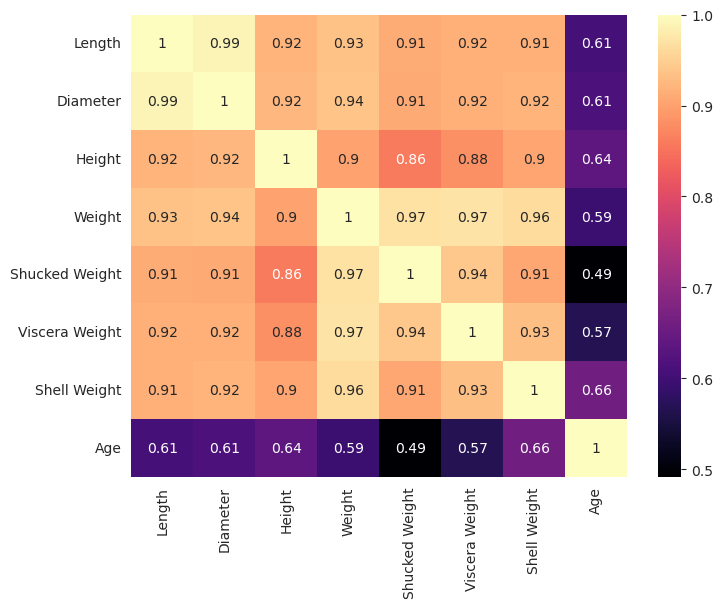

In [12]:
features = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight','Age']
corr = crab_train[features].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = 'magma', annot = True);

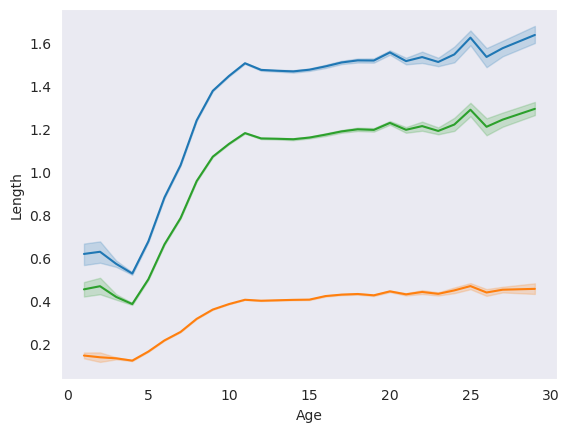

In [13]:
sns.lineplot(data=crab_train,x="Age",y="Length")
sns.lineplot(data=crab_train,x="Age",y="Height")
sns.lineplot(data=crab_train,x="Age",y="Diameter");

In [14]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124051 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124051 non-null  int64  
 1   Length          124051 non-null  float64
 2   Diameter        124051 non-null  float64
 3   Height          124051 non-null  float64
 4   Weight          124051 non-null  float64
 5   Shucked Weight  124051 non-null  float64
 6   Viscera Weight  124051 non-null  float64
 7   Shell Weight    124051 non-null  float64
 8   Age             124051 non-null  float64
 9   F               124051 non-null  uint8  
 10  I               124051 non-null  uint8  
 11  M               124051 non-null  uint8  
dtypes: float64(8), int64(1), uint8(3)
memory usage: 9.8 MB


In [29]:
for i in crab_train.columns:
    count = (crab_train[i] == 0).sum()
    print(i,count)


id 2
Length 2
Diameter 9
Height 66
Weight 0
Shucked Weight 0
Viscera Weight 0
Shell Weight 0
Age 0
F 85669
I 83915
M 78518


In [ ]:
crab

In [13]:
crab_train['Height'].replace(to_replace=0, v='ffill',inplace=True)
crab_train['Length'].replace(to_replace=0, method='ffill',inplace=True)
crab_train['Diameter'].replace(to_replace=0, method='ffill',inplace=True)


countL = (crab_train['Length'] == 0).sum()
countB = (crab_train['Diameter'] == 0).sum()
countH = (crab_train['Height'] == 0).sum()
countSW = (crab_train['Shucked Weight'] == 0).sum()
countShW = (crab_train['Shell Weight'] == 0).sum()
print('Count of zeros in Column Length : ', countL)
print('Count of zeros in Column Diameter : ', countB)
print('Count of zeros in Column Height : ', countH)
print('Count of zeros in Column Shucked Weight : ', countSW)
print('Count of zeros in Column Shell Weight : ', countShW)

crab_train['Top Area'] = crab_train['Length'] * crab_train['Diameter']
# crab_train['Density'] = crab_train['Weight']/(crab_train['Top Area'] * crab_train['Height'])
crab_train["Length Diameter Ratio"]=crab_train['Length']/crab_train['Diameter']
# crab_train["Height Length Ratio"]=crab_test['Height']/crab_test['Length']
crab_train['Shell Shuck Ratio']=crab_train["Shell Weight"]/crab_train["Shucked Weight"]

crab_test['Top Area'] = crab_test['Length'] * crab_test['Diameter']
# crab_test['Density'] = crab_test['Weight']/(crab_test['Top Area'] * crab_test['Height'])
crab_test["Length Diameter Ratio"]=crab_test['Length']/crab_test['Diameter']
# crab_test["Height Length Ratio"]=crab_test['Height']/crab_test['Length']
crab_test['Shell Shuck Ratio']=crab_test["Shell Weight"]/crab_test["Shucked Weight"]

Count of zeros in Column Length :  0
Count of zeros in Column Diameter :  0
Count of zeros in Column Height :  0
Count of zeros in Column Shucked Weight :  0
Count of zeros in Column Shell Weight :  0


In [14]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124051 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     124051 non-null  int64  
 1   Length                 124051 non-null  float64
 2   Diameter               124051 non-null  float64
 3   Height                 124051 non-null  float64
 4   Weight                 124051 non-null  float64
 5   Shucked Weight         124051 non-null  float64
 6   Viscera Weight         124051 non-null  float64
 7   Shell Weight           124051 non-null  float64
 8   Age                    124051 non-null  float64
 9   F                      124051 non-null  uint8  
 10  I                      124051 non-null  uint8  
 11  M                      124051 non-null  uint8  
 12  Top Area               124051 non-null  float64
 13  Length Diameter Ratio  124051 non-null  float64
 14  Shell Shuck Ratio      124051 non-nul

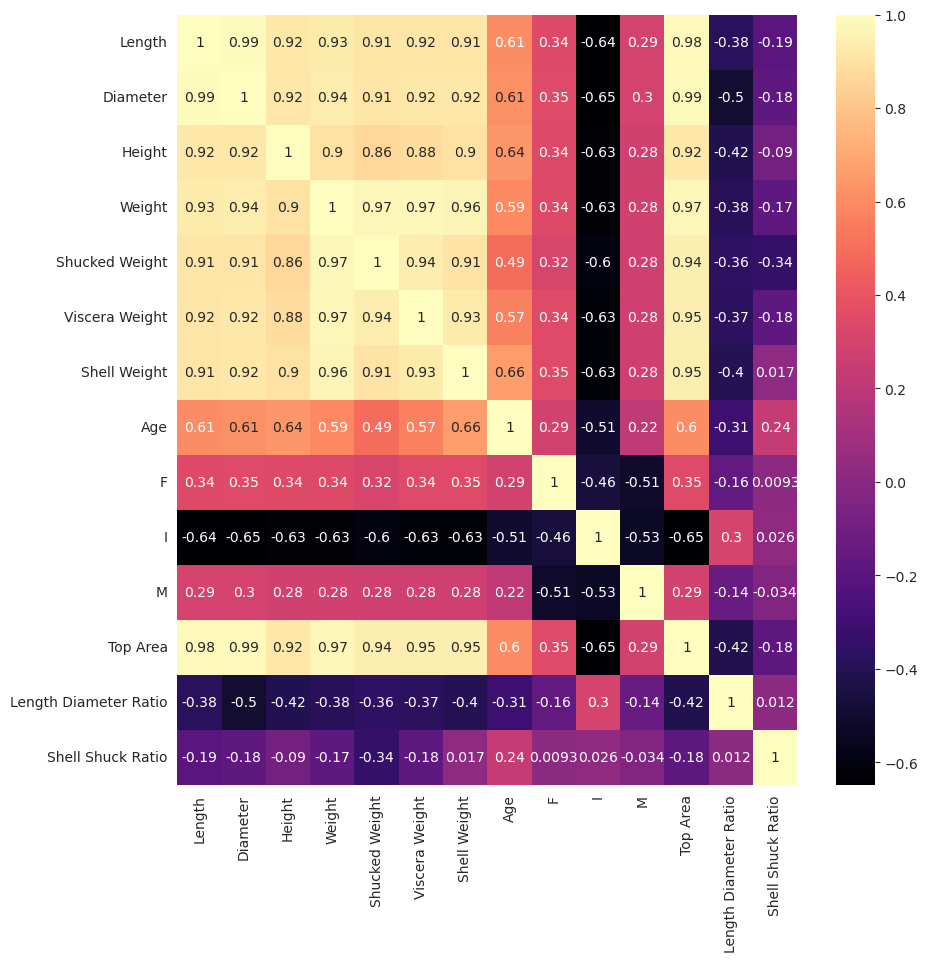

In [15]:
features=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'F', 'I', 'M', 'Top Area',
       'Length Diameter Ratio', 'Shell Shuck Ratio']
corr = crab_train[features].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'magma', annot = True);

# **Models**

In [16]:
crab_train.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'F', 'I', 'M', 'Top Area',
       'Length Diameter Ratio', 'Shell Shuck Ratio'],
      dtype='object')

In [17]:
crab_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124051 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     124051 non-null  int64  
 1   Length                 124051 non-null  float64
 2   Diameter               124051 non-null  float64
 3   Height                 124051 non-null  float64
 4   Weight                 124051 non-null  float64
 5   Shucked Weight         124051 non-null  float64
 6   Viscera Weight         124051 non-null  float64
 7   Shell Weight           124051 non-null  float64
 8   Age                    124051 non-null  float64
 9   F                      124051 non-null  uint8  
 10  I                      124051 non-null  uint8  
 11  M                      124051 non-null  uint8  
 12  Top Area               124051 non-null  float64
 13  Length Diameter Ratio  124051 non-null  float64
 14  Shell Shuck Ratio      124051 non-nul

In [18]:
# X_train = crab_train[['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M']]
# X_test = crab_test[['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M']]
# y_train = crab_train.Age

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import datasets, ensemble
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor, HuberRegressor
from sklearn.linear_model import BayesianRidge
# cols = ['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
#        'Viscera Weight', 'Shell Weight', 'F', 'I', 'M', 'Top Area',
#        'Length Diameter Ratio', 'Shell Shuck Ratio']
cols = ['id', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'F', 'I', 'M', 'Top Area',
       'Length Diameter Ratio','Shell Shuck Ratio']
X_train, X_test, y_train, y_test = train_test_split(crab_train[cols], crab_train.Age, test_size=0.3,random_state=100)
seed = np.random.seed(0)

In [20]:
crab_train.columns
# crab_train_y = crab_train["Age"] # Full training data
# crab_train_x = crab_train[cols]  # Full training data

crab_train_x = X_train
crab_train_y = y_train

In [21]:
rfmodel = RandomForestRegressor(max_depth= 8,min_samples_leaf= 10,random_state=seed)
rfmodel.fit(crab_train_x,crab_train_y)

KeyboardInterrupt: 

In [ ]:
brmodel = BayesianRidge(verbose=True,tol=0.001,compute_score=True,)
brmodel.fit(crab_train_x,crab_train_y)

In [ ]:
gbmodel = GradientBoostingRegressor(max_depth= 8,loss='absolute_error',random_state=seed)
gbmodel.fit(crab_train_x, crab_train_y)

In [ ]:
hbmodel = HuberRegressor(max_iter = 100000,epsilon=1.4)
hbmodel.fit(crab_train_x,crab_train_y)

In [ ]:
xgbmodel = XGBRegressor(max_depth= 8,random_state=seed,learning_rate = 0.01,n_estimators= 1000,objective='reg:absoluteerror')
xgbmodel.fit(crab_train_x, crab_train_y)

In [ ]:
catmodel = CatBoostRegressor(random_state=seed, iterations = 1100,verbose=False,max_depth=12)
catmodel.fit(crab_train_x, crab_train_y)

In [ ]:
lgbmodel = LGBMRegressor(max_depth= 10,random_state=seed,learning_rate=0.075)
lgbmodel.fit(crab_train_x, crab_train_y)

In [ ]:
hgbmodel = HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error',max_iter=10000,warm_start=True,n_iter_no_change=8)
hgbmodel.fit(crab_train_x,crab_train_y)

In [ ]:
vrmodel = VotingRegressor([('rf',rfmodel),('gb', gbmodel),('xgb', xgbmodel),('cat',catmodel),('hgb',hgbmodel), ('lgb', lgbmodel)],weights=[0.5,1,1,0.8,1,0.8])
vrmodel.fit(crab_train_x, crab_train_y)

In [ ]:
print(mean_absolute_error(y_test, rfmodel.predict(X_test)))
print(mean_absolute_error(y_test, brmodel.predict(X_test)))
print(mean_absolute_error(y_test, gbmodel.predict(X_test)))
print(mean_absolute_error(y_test, hbmodel.predict(X_test)))
print(mean_absolute_error(y_test, xgbmodel.predict(X_test)))
print(mean_absolute_error(y_test, catmodel.predict(X_test)))
print(mean_absolute_error(y_test, lgbmodel.predict(X_test)))
print(mean_absolute_error(y_test, hgbmodel.predict(X_test)))
print(mean_absolute_error(y_test, vrmodel.predict(X_test)))

In [ ]:
predictions = vrmodel.predict(crab_test)

In [ ]:
crab_test['Age'] = predictions

In [ ]:
crab_test.columns

In [ ]:
crab_test.drop(['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight','Viscera Weight', 'Shell Weight', 'F', 'I', 'M', 'Top Area','Length Diameter Ratio', 'Shell Shuck Ratio'],axis = 1,inplace = True)

In [ ]:
crab_test.head()

In [ ]:
crab_test.to_csv('submission_syn.csv',header=True,index=False)